In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/repo_tesis/entorno_tesis_Molina


In [ ]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import os
from sklearn.pipeline import Pipeline

# Cálculo de cantidad de parámetros
Se calculan la cantidad de parámetros en los modelos Extra Trees y GBM.

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# voy levantando los modelos para calcular la cantidad de parámetros
# arquitecturas = ['dt', 'et', 'gbm']
nombres_clasificador = ['et_classifier', 'et_classifier', 'gbm_classifier', 'gbm_classifier'] # 'dt_classifier', 'dt_classifier',

# Asumiendo que estoy en el directorio especificado más arriba
archivos_modelos = [
    "et/et_HW_NP_10_sep_sub_n_estimators_trainTest_modelos.pkl",
    "et/et_HW_NP_10_sep_rep_n_estimators_trainTest_modelos.pkl",
    "gbm/gbm_HW_NP_10_sep_sub_n_estimators_trainTest_modelos.pkl",
    "gbm/gbm_HW_NP_10_sep_rep_n_estimators_trainTest_modelos.pkl"
]
# "dt/dt_HW_NP_10_sep_sub_max_depth_trainTest_modelos.pkl", "dt/dt_HW_NP_10_sep_rep_max_depth_trainTest_modelos.pkl",
ruta_experimento = "/content/drive/My Drive/tesis_Molina/estructura_codigos/experimentos_mlp_arboles/resultados/resultados_train_test"
os.chdir(ruta_experimento) # me situo en el directorio
# %cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/"
cant_nodos = []
cant_nodos_media = []
for j in range(len(archivos_modelos)):
  modelos = joblib.load(archivos_modelos[j])
  cant_nodos_arquitectura = []

  for i in modelos:
    if j<2:
  # Acceder al clasificador dentro del pipeline
      classifier = i.named_steps[nombres_clasificador[j]]
      # Contar el número total de nodos en todos los árboles
      cant_nodos_arquitectura.append(sum(tree.tree_.node_count - tree.tree_.n_leaves for tree in classifier.estimators_))
      classifier = 0
    else:
      classifier = i.named_steps[nombres_clasificador[j]]
      # Obtener el modelo de LightGBM en formato de texto y contar los nodos internos
      model_text = classifier.booster_.dump_model()
      cant_nodos_arquitectura.append(sum(tree['num_leaves'] - 1 for tree in model_text['tree_info']))
      classifier = 0
  cant_nodos.append(cant_nodos_arquitectura)
  cant_nodos_media.append(np.mean(cant_nodos_arquitectura))
  modelos = 0

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
arquitectura = ['et_x_sujeto', 'et_x_repe', 'gbm_x_sujeto', 'gbm_x_repe']
data = {'arquitectura': arquitectura,
        'media_cantidad_parametros': cant_nodos_media}
data = pd.DataFrame(data)
joblib.dump(data, "cantidad_parametros_et_gbm.pkl")
data

,arquitectura,media_cantidad_parametros
0,et_x_sujeto,1001704.9
1,et_x_repe,1516086.7
2,gbm_x_sujeto,19500.0
3,gbm_x_repe,39000.0


# Cargar datos de métricas
Levanto las métricas de los resultados del Grid Search para cada arquitectura de modelo

In [ ]:
# Extra Trees
# %cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/et"
os.chdir(ruta_experimento + '/et') # me situo en el directorio

metricas_et = joblib.load('et_HW_NP_10_sep_sub_n_estimators_trainTest_metricas.pkl')
metricas_et_rep = joblib.load('et_HW_NP_10_sep_rep_n_estimators_trainTest_metricas.pkl')

# GBM
# %cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/gbm"
os.chdir(ruta_experimento + '/gbm') # me situo en el directorio
metricas_gbm = joblib.load('gbm_HW_NP_10_sep_sub_n_estimators_trainTest_metricas.pkl')
metricas_gbm_rep = joblib.load('gbm_HW_NP_10_sep_rep_n_estimators_trainTest_metricas.pkl')
# modelos_gbm = joblib.load('gbm_HW_NP_10_sep_sub_n_estimators_trainTest_modelos.pkl')
# modelos_gbm_rep = joblib.load('gbm_HW_NP_10_sep_rep_n_estimators_trainTest_modelos.pkl')

# Decision Tree
# %cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/dt"
os.chdir(ruta_experimento + '/dt') # me situo en el directorio
metricas_dt = joblib.load('dt_HW_NP_10_sep_sub_max_depth_trainTest_metricas.pkl')
metricas_dt_rep = joblib.load('dt_HW_NP_10_sep_rep_max_depth_trainTest_metricas.pkl')
# modelos_dt = joblib.load('dt_HW_NP_10_sep_sub_max_depth_trainTest_modelos.pkl')
# modelos_dt_rep = joblib.load('dt_HW_NP_10_sep_rep_max_depth_trainTest_modelos.pkl')

# MLP
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/mlp"

metricas_mlp = joblib.load('mlp_HW_NP_10_sep_sub_earlyStopping_trainTest_metricas.pkl')
metricas_mlp_rep = joblib.load('mlp_HW_NP_10_sep_rep_earlyStopping_trainTest_metricas.pkl')

# particiones_CV = joblib.load('ps_gbm_PredefinedSplit.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/mlp


Voy a graficar accuracy en test y tiempo de inferencia.

In [ ]:
# variables para armar los boxplot
metricas_gbm_acc = metricas_gbm['accuracy_test']
metricas_gbm_rep_acc = metricas_gbm_rep['accuracy_test']
metricas_mlp_acc = metricas_mlp['accuracy_test']
metricas_mlp_rep_acc = metricas_mlp_rep['accuracy_test']
metricas_et_acc = metricas_et['accuracy_test']
metricas_et_rep_acc = metricas_et_rep['accuracy_test']
metricas_dt_rep_acc = metricas_dt_rep['accuracy_test']
metricas_dt_acc = metricas_dt['accuracy_test']

In [ ]:
# variables para armar los boxplot
metricas_gbm_ti = metricas_gbm['mean_score_time_x_dato']
metricas_gbm_rep_ti = metricas_gbm_rep['mean_score_time_x_dato']
metricas_mlp_ti = metricas_mlp['mean_score_time_x_dato']
metricas_mlp_rep_ti = metricas_mlp_rep['mean_score_time_x_dato']
metricas_et_ti = metricas_et['mean_score_time_x_dato']
metricas_et_rep_ti = metricas_et_rep['mean_score_time_x_dato']
metricas_dt_rep_ti = metricas_dt_rep['mean_score_time_x_dato']
metricas_dt_ti = metricas_dt['mean_score_time_x_dato']

# Visualización de métricas en figuras

## Comparación GBM vs Extra Trees

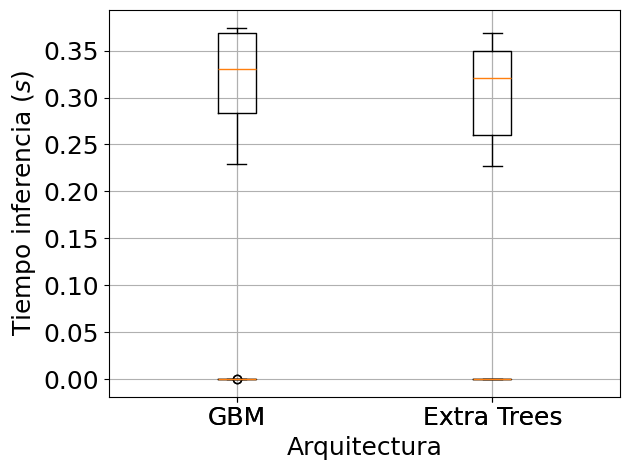

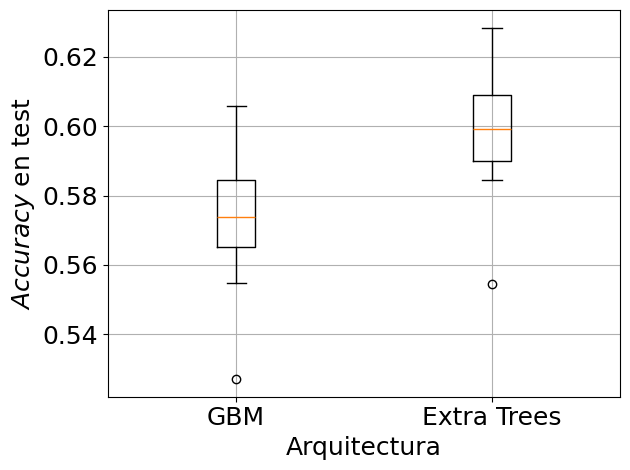

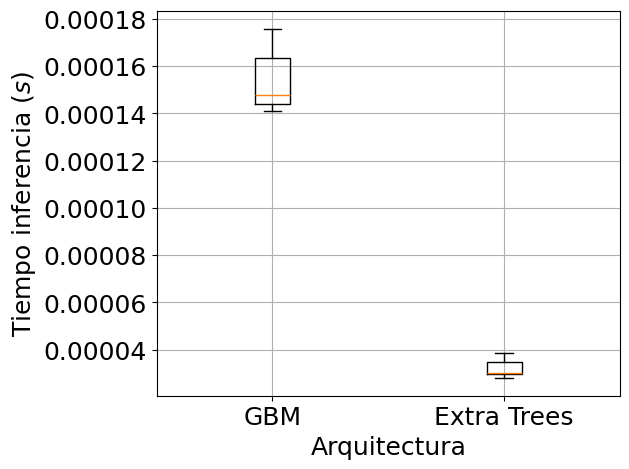

In [ ]:
# %cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/graficas"
os.chdir(ruta_experimento + '/graficas') # me situo en el directorio

# Crear el boxplot accuracy por sujeto
plt.boxplot([metricas_gbm_acc, metricas_et_acc], labels=['GBM', 'Extra Trees'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
# plt.grid()

# Guardar la figura
plt.savefig('boxplot_acc_sep_sub_gbm_et.pdf')

# Crear el boxplot tiempo inferencia por sujeto
plt.boxplot([metricas_gbm_ti, metricas_et_ti], labels=['GBM', 'Extra Trees'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('Tiempo inferencia ($s$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_ti_sep_sub_gbm_et.pdf')

# Mostrar el gráfico
plt.show()

# Crear el boxplot accuracy por repetición
plt.boxplot([metricas_gbm_rep_acc, metricas_et_rep_acc], labels=['GBM', 'Extra Trees'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_acc_sep_rep_gbm_et.pdf')

# Mostrar el gráfico
plt.show()

# Crear el boxplot tiempo inferencia por repetición
plt.boxplot([metricas_gbm_rep_ti, metricas_et_rep_ti], labels=['GBM', 'Extra Trees'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('Tiempo inferencia ($s$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_ti_sep_rep_gbm_et.pdf')

# Mostrar el gráfico
plt.show()


## Comparación GBM vs Extra Trees vs Decision Tree

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/graficas


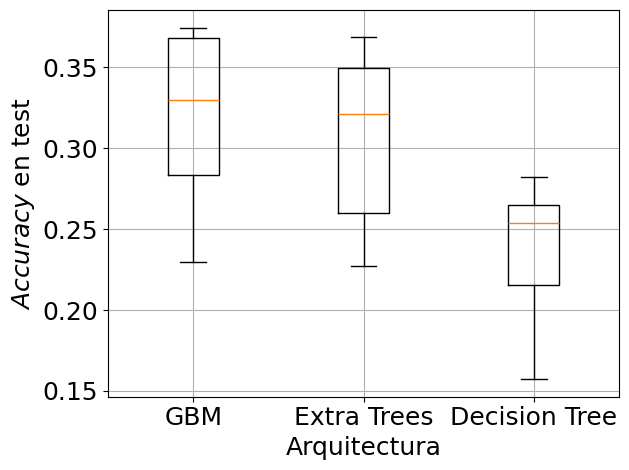

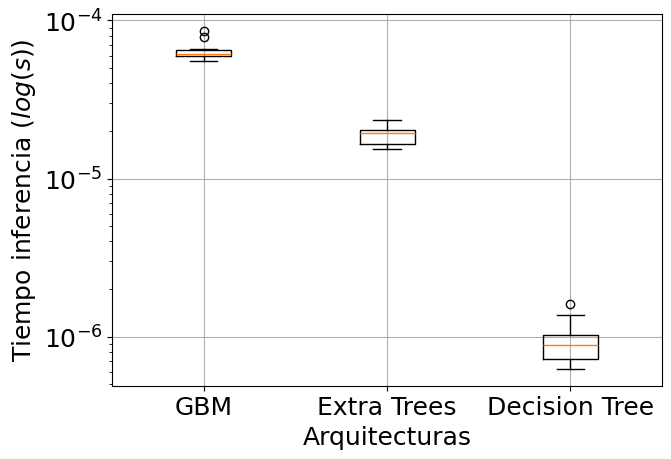

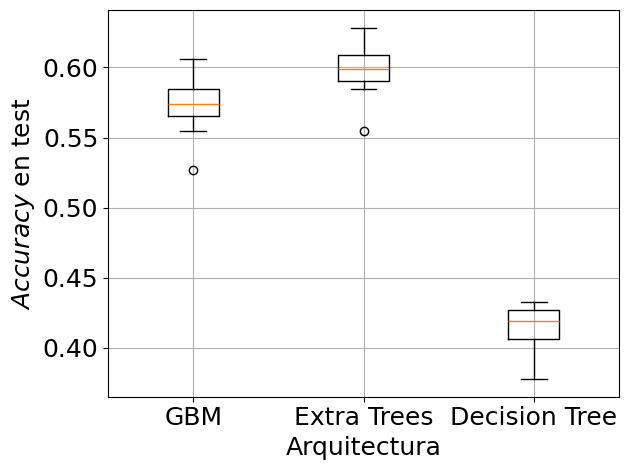

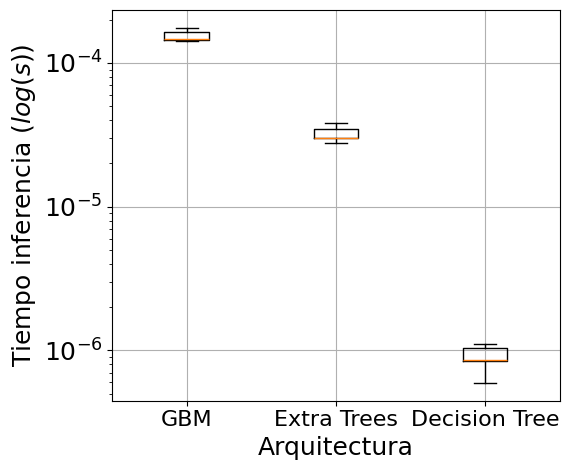

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/graficas"
plt.figure()
# Crear el boxplot accuracy por sujeto
plt.boxplot([metricas_gbm_acc, metricas_et_acc, metricas_dt_acc], labels=['GBM', 'Extra Trees', 'Decision Tree'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_acc_sep_sub_gbm_et_dt.pdf')

plt.figure()
# Crear el boxplot tiempo inferencia por sujeto
plt.boxplot([metricas_gbm_ti, metricas_et_ti, metricas_dt_ti], labels=['GBM', 'Extra Trees', 'Decision Tree'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitecturas', fontsize=18)
plt.ylabel('Tiempo inferencia ($log(s)$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula y escala logarítmica
plt.grid()
plt.tight_layout()
plt.yscale('log')

# Guardar la figura
plt.savefig('boxplot_ti_sep_sub_gbm_et_dt.pdf')

plt.figure()
# Crear el boxplot accuracy por repetición
plt.boxplot([metricas_gbm_rep_acc, metricas_et_rep_acc, metricas_dt_rep_acc], labels=['GBM', 'Extra Trees', 'Decision Tree'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_acc_sep_rep_gbm_et_dt.pdf')

plt.figure()
# Crear el boxplot tiempo inferencia por repetición
plt.boxplot([metricas_gbm_rep_ti, metricas_et_rep_ti, metricas_dt_rep_ti], labels=['GBM', 'Extra Trees', 'Decision Tree'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('Tiempo inferencia ($log(s)$)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

# Añadir una cuadrícula y escala logarítmica
plt.grid()
plt.tight_layout()
plt.yscale('log')

# Guardar la figura
plt.savefig('boxplot_ti_sep_rep_gbm_et_dt.pdf')


## Comparación GBM vs Extra Trees vs MLP

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/graficas


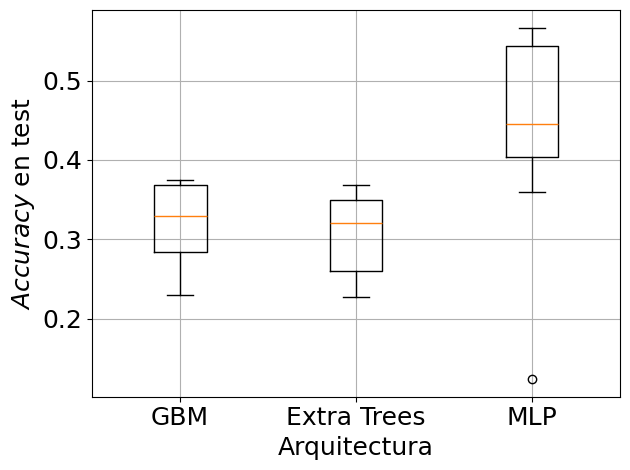

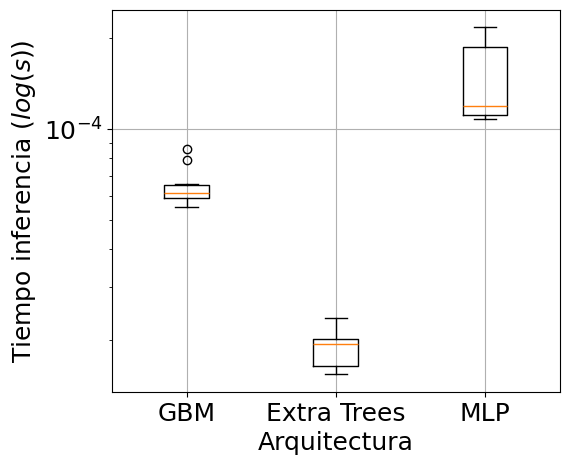

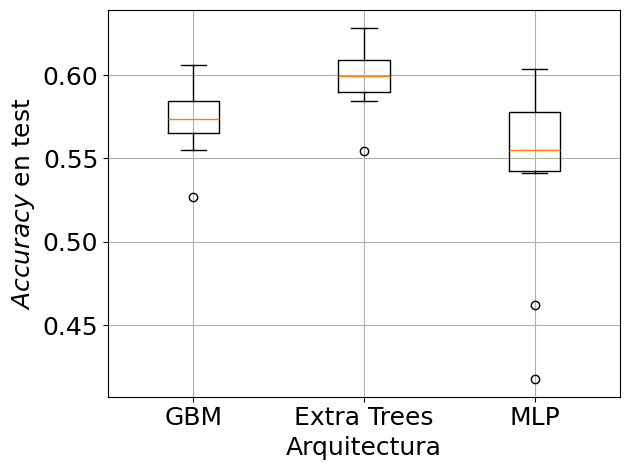

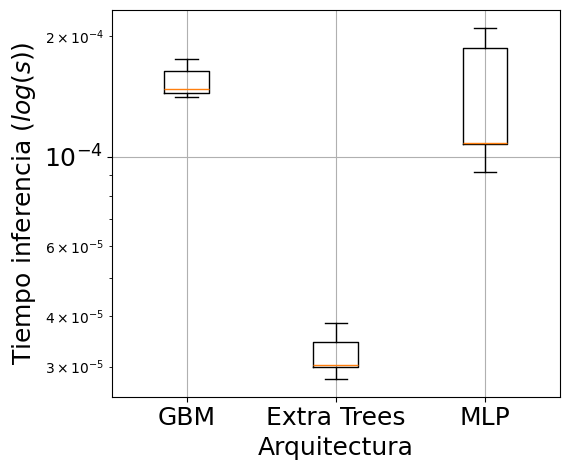

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_definitivos/graficas"
plt.figure()
# Crear el boxplot accuracy por sujeto
plt.boxplot([metricas_gbm_acc, metricas_et_acc, metricas_mlp_acc], labels=['GBM', 'Extra Trees', 'MLP'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_acc_sep_sub_gbm_et_mlp.pdf')

plt.figure()
# Crear el boxplot tiempo inferencia por sujeto
plt.boxplot([metricas_gbm_ti, metricas_et_ti, metricas_mlp_ti], labels=['GBM', 'Extra Trees', 'MLP'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('Tiempo inferencia ($log(s)$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula y escala logarítmica
plt.grid()
plt.tight_layout()
plt.yscale('log')

# Guardar la figura
plt.savefig('boxplot_ti_sep_sub_gbm_et_mlp.pdf')

plt.figure()
# Crear el boxplot accuracy por repetición
plt.boxplot([metricas_gbm_rep_acc, metricas_et_rep_acc, metricas_mlp_rep_acc], labels=['GBM', 'Extra Trees', 'MLP'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('$Accuracy$ en test', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula
plt.grid()
plt.tight_layout()
# Guardar la figura
plt.savefig('boxplot_acc_sep_rep_gbm_et_mlp.pdf')

plt.figure()
# Crear el boxplot tiempo inferencia por repetición
plt.boxplot([metricas_gbm_rep_ti, metricas_et_rep_ti, metricas_mlp_rep_ti], labels=['GBM', 'Extra Trees', 'MLP'])

# Ajustar el tamaño del texto
plt.xlabel('Arquitectura', fontsize=18)
plt.ylabel('Tiempo inferencia ($log(s)$)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Añadir una cuadrícula y escala logarítmica
plt.grid()
# Ajustar los márgenes
plt.tight_layout()
plt.yscale('log')

# Guardar la figura
plt.savefig('boxplot_ti_sep_rep_gbm_et_mlp.pdf')


# Visualización de métricas en tablas

In [ ]:
metricas_gbm.loc[:, ['sujeto_test', 'accuracy_train', 'accuracy_test', 'mean_score_time_x_dato']]
metricas_gbm_acc = metricas_gbm

,sujeto_test,accuracy_train,accuracy_test,mean_score_time_x_dato
0,0,0.853344,0.279777,0.000061
1,1,0.856995,0.374524,0.000059
2,2,0.854628,0.370791,0.000062
3,3,0.861157,0.368777,0.000066
4,4,0.859888,0.366800,0.000058
5,5,0.867270,0.229527,0.000086
6,6,0.863702,0.295200,0.000064
7,7,0.857749,0.324002,0.000061
8,8,0.858473,0.335735,0.000055
9,9,0.860299,0.245323,0.000079


In [ ]:
metricas_gbm_rep.loc[:, ['sujeto_test', 'accuracy_train', 'accuracy_test', 'mean_score_time_x_dato']]

,sujeto_test,accuracy_train,accuracy_test,mean_score_time_x_dato
0,0,0.960945,0.575028,0.000148
1,1,0.961096,0.605946,0.000144
2,2,0.962364,0.527068,0.000176
3,3,0.961704,0.566882,0.000148
4,4,0.962143,0.585030,0.000168
5,5,0.961758,0.582414,0.000147
6,6,0.962879,0.554918,0.000176
7,7,0.960972,0.598608,0.000141
8,8,0.961193,0.564737,0.000143
9,9,0.962003,0.572629,0.000145


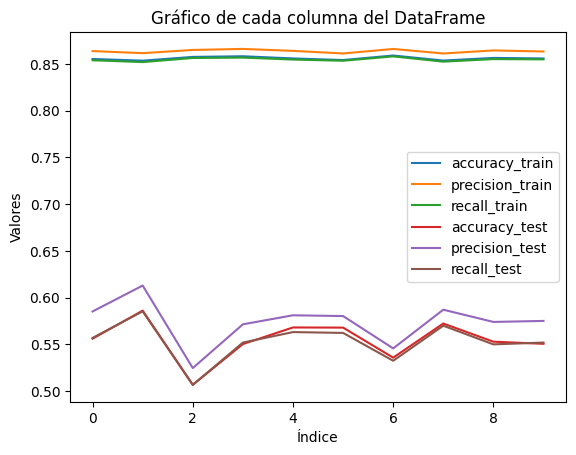

In [ ]:
df = pd.DataFrame(metricas)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar cada columna
for column in df.columns[1:]:
    ax.plot(df.index, df[column], label=column)

# Añadir la leyenda
ax.legend()

# Añadir títulos y etiquetas
ax.set_title('Gráfico de cada columna del DataFrame')
ax.set_xlabel('Índice')
ax.set_ylabel('Valores')

# Mostrar el gráfico
plt.show()

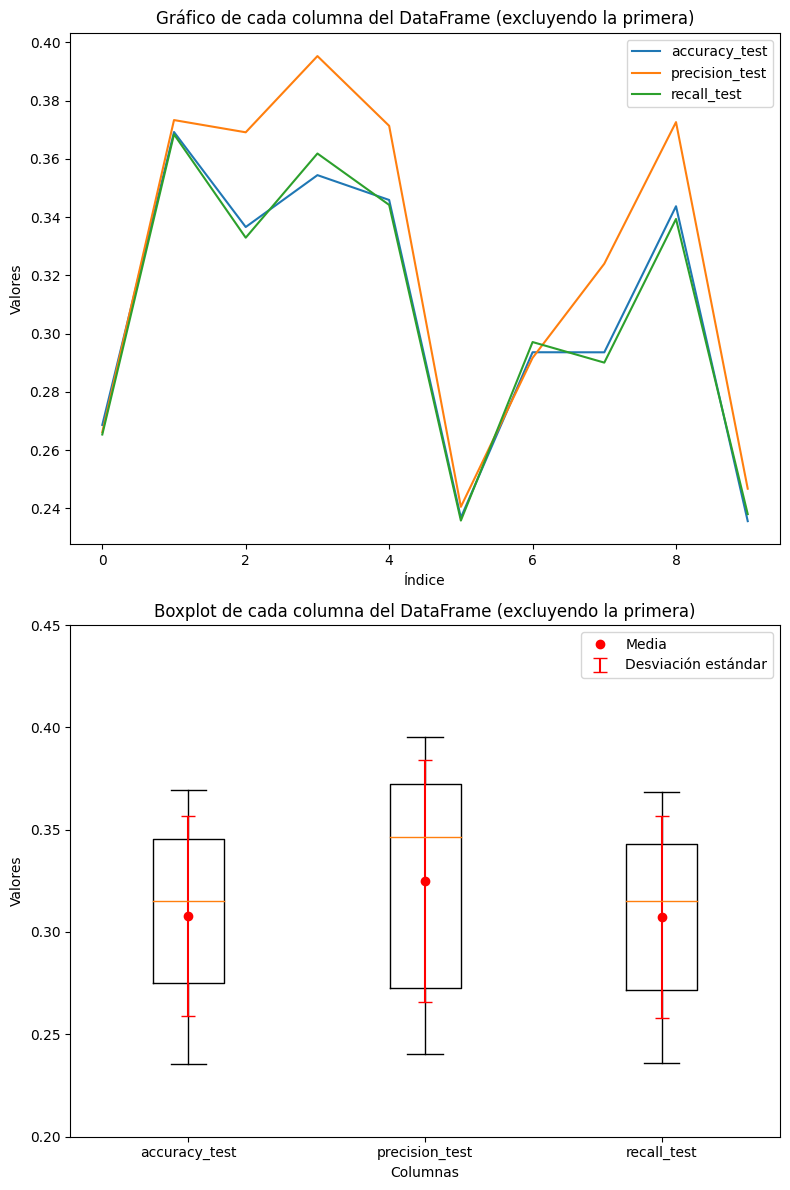

In [ ]:
df = pd.DataFrame(metricas)

# Excluir la primera columna
df_excl = df.iloc[:, 4:]

# Crear una figura y dos ejes (uno para el gráfico de líneas y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Graficar cada columna en el primer eje (ax1)
for column in df_excl.columns:
    ax1.plot(df_excl.index, df_excl[column], label=column)

# Añadir la leyenda al primer eje
ax1.legend()

# Añadir títulos y etiquetas al primer eje
ax1.set_title('Gráfico de cada columna del DataFrame (excluyendo la primera)')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valores')

# Crear un boxplot en el segundo eje (ax2)
ax2.boxplot(df_excl.values, labels=df_excl.columns)

# Calcular y graficar la media y desviación estándar para cada columna en el segundo eje (ax2)
means = df_excl.mean()
stds = df_excl.std()

# Añadir la media con puntos rojos
ax2.plot(range(1, len(df_excl.columns) + 1), means, 'ro', label='Media')

# Añadir la desviación estándar con barras de error
ax2.errorbar(range(1, len(df_excl.columns) + 1), means, yerr=stds, fmt='none', ecolor='red', capsize=5, label='Desviación estándar')

# Añadir leyenda al segundo eje
ax2.legend()

# Añadir títulos y etiquetas al segundo eje
ax2.set_title('Boxplot de cada columna del DataFrame (excluyendo la primera)')
ax2.set_xlabel('Columnas')
ax2.set_ylabel('Valores')
ax2.set_ylim([0.2, 0.45])

# Mostrar el gráfico
plt.tight_layout()
plt.show()